In [6]:
bsc = xr.open_dataset("nc_files/NASA-GEOS-5/20211201_NASA-GEOS.nc")
bsc


<xarray.Dataset>
Dimensions:     (time: 25, lat: 261, lon: 273)
Coordinates:
  * lat         (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 64.25 64.5 64.75 65.0
  * lon         (lon) float64 -25.0 -24.69 -24.38 -24.06 ... 59.38 59.69 60.0
  * time        (time) datetime64[ns] 2021-12-01 ... 2021-12-04
Data variables:
    OD550_DUST  (time, lat, lon) float32 ...
    SCONC_DUST  (time, lat, lon) float32 ...

In [7]:
# 11 19
bsc.time.to_series()[19]

Timestamp('2021-12-03 09:00:00')

In [8]:
nc_files = os.listdir("nc_files/NASA-GEOS-5/")
len(nc_files)

42

In [9]:
day1_lead_all = pd.DataFrame(columns=["stn", "lon", "lat"])
for nc_file in nc_files:
    bsc = xr.open_dataset("nc_files/NASA-GEOS-5/"+nc_file)
    day1_lead = [["stn", "lon", "lat", bsc.OD550_DUST.time.to_series()[19]]]
    for i in range(len(stn)):
        day1_bsc = bsc.OD550_DUST.isel(time = 19).sel(lat = stn_lat[i], 
                                                     lon = stn_lon[i], 
                                                     method = 'nearest')
        day1_lead.append([stn[i], stn_lon[i], stn_lat[i], day1_bsc.to_dict()["data"]])
    day1_lead = pd.DataFrame(day1_lead[1:len(day1_lead)], columns = day1_lead[0])
    day1_lead_all = day1_lead_all.merge(day1_lead, 
                                        left_on=["stn", "lon", "lat"], 
                                        right_on=["stn", "lon", "lat"],
                                        how = "outer")
#data for 1 day leadtime for all sations
day1_lead_all

,stn,lon,lat,2021-12-03 09:00:00,2021-12-05 09:00:00,2021-12-06 09:00:00,2021-12-07 09:00:00,2021-12-10 09:00:00,2021-12-11 09:00:00,2021-12-12 09:00:00,...,2022-01-19 09:00:00,2022-01-20 09:00:00,2022-01-24 09:00:00,2022-01-26 09:00:00,2022-01-28 09:00:00,2022-01-29 09:00:00,2022-01-30 09:00:00,2022-01-31 09:00:00,2022-02-01 09:00:00,2022-02-02 09:00:00
0,ABE,3.33,7.20,0.0,0.898742,0.730787,0.0,0.362619,0.0,0.974911,...,0.221490,0.302557,0.414358,0.221767,0.472513,0.692719,0.858735,0.421229,0.0,0.527661
1,ABK,8.19,6.25,0.0,0.510070,0.399732,0.0,0.467600,0.0,0.421200,...,0.404595,0.360174,0.327444,0.385586,0.597024,0.607758,0.539399,0.385096,0.0,0.406079
2,ABU,7.20,9.00,0.0,1.277649,0.513013,0.0,0.436350,0.0,0.310848,...,0.254205,0.338201,0.296682,0.243008,0.489602,0.556977,0.483735,0.404139,0.0,0.472486
3,ADO,5.20,7.60,0.0,0.893860,0.524732,0.0,0.362619,0.0,0.479794,...,0.195367,0.277654,0.370412,0.207363,0.410013,0.618500,0.516938,0.303065,0.0,0.408521
4,AKU,5.30,7.20,0.0,0.862610,0.513013,0.0,0.356760,0.0,0.505184,...,0.201226,0.300603,0.385549,0.215664,0.417337,0.664399,0.539399,0.337733,0.0,0.453931
5,ASA,6.23,6.82,0.0,0.598938,0.384595,0.0,0.415354,0.0,0.512997,...,0.272760,0.353338,0.340627,0.260586,0.568704,0.652680,0.585298,0.368983,0.0,0.534497
6,AWK,7.07,6.20,0.0,0.592102,0.408033,0.0,0.420725,0.0,0.471493,...,0.338189,0.347478,0.313772,0.330898,0.590188,0.511079,0.538423,0.354823,0.0,0.457837
7,BAU,9.82,10.28,0.0,0.388488,0.261549,0.0,0.452463,0.0,0.242733,...,0.314752,0.325994,0.213430,0.278652,0.639017,0.536469,0.586274,0.309901,0.0,0.434400
8,BEN,5.60,6.33,0.0,0.577453,0.419752,0.0,0.426584,0.0,0.611630,...,0.255670,0.366521,0.370901,0.272793,0.518899,0.729829,0.672212,0.417811,0.0,0.627271
9,BID,6.00,9.80,0.0,1.119445,0.560865,0.0,0.404123,0.0,0.394833,...,0.339654,0.318182,0.304006,0.226406,0.664407,0.675141,0.451509,0.379725,0.0,0.556958


In [10]:
day1_lead_all_t = day1_lead_all.transpose()
day1_lead_all_t.columns = day1_lead_all_t.iloc[0]
day1_lead_all_t = day1_lead_all_t.drop(["lon", "lat", "stn"])

# multiply AOD by 10
# day1_lead_all_t = day1_lead_all_t * 10

day1_lead_all_t = day1_lead_all_t.reset_index()
day1_lead_all_t

stn,index,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
0,2021-12-03 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-12-05 09:00:00,0.898742,0.51007,1.277649,0.89386,0.86261,0.598938,0.592102,0.388488,0.577453,...,0.376281,0.89093,0.573547,0.574524,0.60675,0.560852,0.92218,0.491027,0.357727,0.436828
2,2021-12-06 09:00:00,0.730787,0.399732,0.513013,0.524732,0.513013,0.384595,0.408033,0.261549,0.419752,...,0.278638,0.48567,0.342115,0.440259,0.451978,0.40315,0.359693,0.406568,0.207105,0.273756
3,2021-12-07 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-12-10 09:00:00,0.362619,0.4676,0.43635,0.362619,0.35676,0.415354,0.420725,0.452463,0.426584,...,0.476389,0.363596,0.488108,0.408518,0.374826,0.387033,0.414865,0.368479,0.4051,0.518869
5,2021-12-11 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2021-12-12 09:00:00,0.974911,0.4212,0.310848,0.479794,0.505184,0.512997,0.471493,0.242733,0.61163,...,0.296688,0.7337,0.241512,0.394344,0.385555,0.565731,0.322567,0.474423,0.210995,0.238583
7,2021-12-15 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2021-12-16 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2021-12-17 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
day1_lead_all_t["index"] = pd.to_datetime(day1_lead_all_t["index"], format="%Y-%m-%d").dt.date
day1_lead_all_t = day1_lead_all_t.set_index("index")
day1_lead_all_t

stn,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
index,,,,,,,,,,,,,,,,,,,,,
2021-12-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-05,0.898742,0.51007,1.277649,0.89386,0.86261,0.598938,0.592102,0.388488,0.577453,1.119445,...,0.376281,0.89093,0.573547,0.574524,0.60675,0.560852,0.92218,0.491027,0.357727,0.436828
2021-12-06,0.730787,0.399732,0.513013,0.524732,0.513013,0.384595,0.408033,0.261549,0.419752,0.560865,...,0.278638,0.48567,0.342115,0.440259,0.451978,0.40315,0.359693,0.406568,0.207105,0.273756
2021-12-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-10,0.362619,0.4676,0.43635,0.362619,0.35676,0.415354,0.420725,0.452463,0.426584,0.404123,...,0.476389,0.363596,0.488108,0.408518,0.374826,0.387033,0.414865,0.368479,0.4051,0.518869
2021-12-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-12,0.974911,0.4212,0.310848,0.479794,0.505184,0.512997,0.471493,0.242733,0.61163,0.394833,...,0.296688,0.7337,0.241512,0.394344,0.385555,0.565731,0.322567,0.474423,0.210995,0.238583
2021-12-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# na.array(vis['YOL'])
# merged = pd.merge(vis[["YOL"]], day1_lead_all_t[["YOL"]], left_index=True, right_on="index")
merged = pd.concat([vis[["YOL"]], day1_lead_all_t[["YOL"]]], axis=1)
merged.columns = ["Visibility", "AOD"]
merged

,Visibility,AOD
2021-12-01,10.0,NaN
2021-12-02,1.0,NaN
2021-12-03,1.6,0.0
2021-12-04,2.0,NaN
2021-12-05,5.0,0.357727
...,...,...
2022-01-29,5.0,0.522797
2022-01-30,5.0,0.485688
2022-01-31,8.0,0.392421
2022-02-01,NaN,0.0


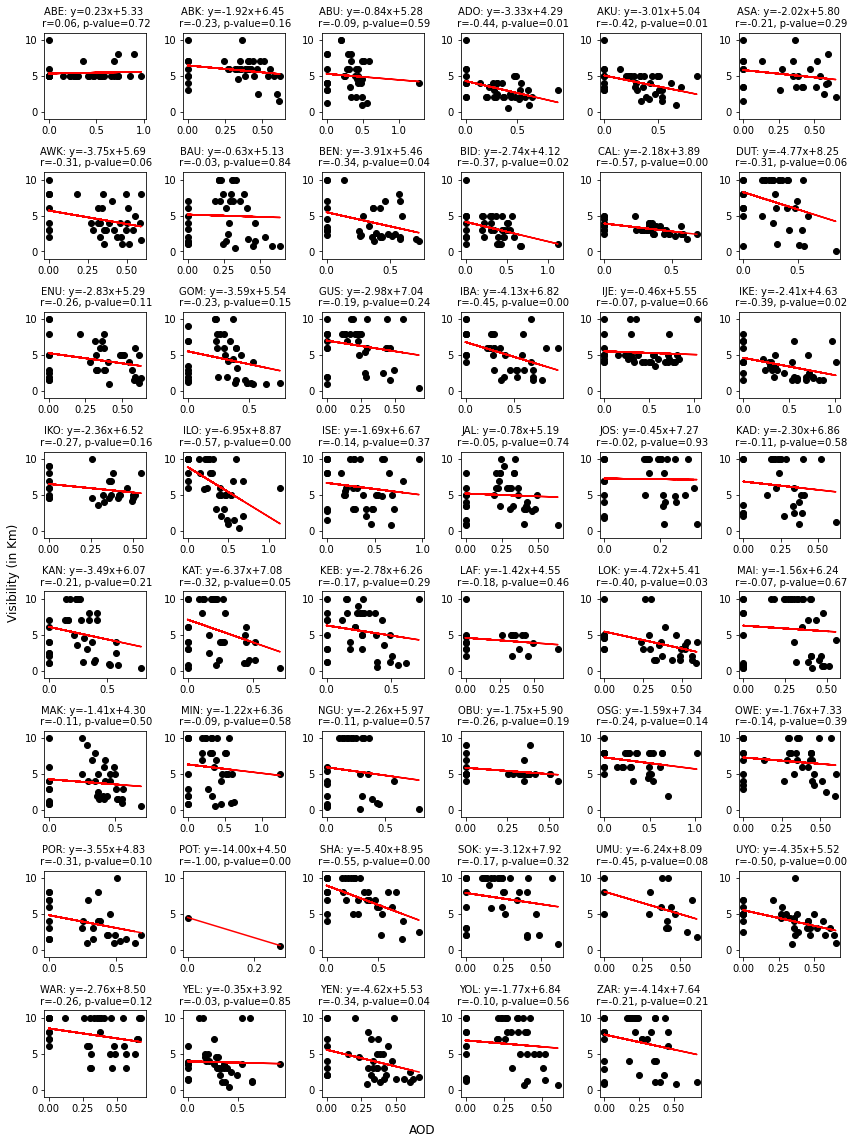

In [13]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

cor_ls = []

fig = plt.figure(figsize=(12,16))
# fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, j in enumerate(stn):
    merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
    merged.columns = ["Visibility", "AOD"]
    a=merged.dropna()
#     regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(list(a['AOD']),list(a['Visibility']))
    line = (slope*a['AOD'])+intercept
    
    # append correlation
    cor_ls.append([stn_lat[i], stn_lon[i], j, round(r_value, 2), round(p_value, 2)])
    
    ax = fig.add_subplot(8,6,i+1, )
    ax.scatter(merged['AOD'], merged['Visibility'], color = 'k')
    ax.plot(list(a['AOD']), line, 'r')
    title = j+': y={:.2f}x+{:.2f} \n '.format(slope,intercept)  + 'r={:.2f}, '.format(r_value) + 'p-value={:.2f}'.format(p_value)

    ax.set_title(title, fontsize = 10)
#     ax.set_xlim([0, 1.5])
    ax.set_ylim([-1, 11])
    
#     ax.set_ylabel('Visibility (in Km)')
#     ax.set_xlabel('bbb')
# fig.suptitle('a')
fig.supxlabel('AOD')
fig.supylabel('Visibility (in Km)')
fig.tight_layout(rect=(0.0,0,1,1))
    
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X")
# plt.ylabel("common Y")    
#     plt.subplot(7,7,i+1)
#     plt.scatter(merged['AOD'], merged['Visibility'], color = 'k', ls='solid')
#     plt.title(j)
# plt.xlabel('AOD')
# plt.ylabel('Visibility (in Km)')
#     plt.text(j)
#     for j in stn:
        
#         plt.subplot(2, 3, i)
#         plt.scatter(merged['AOD'], merged['Visibility'])
# # #         plt.text(0.5, 0.5, str((2, 3, i)),
# # #                  fontsize=18, ha='center')
            


# # fig = plt.figure(figsize=(3,3))
# fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(15,15))
# plt.subplots_adjust(hspace=0.2)
# for j, ax in zip(stn, axs.ravel()):
#     print(j, ax)
#     merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
#     merged.columns = ["Visibility", "AOD"]
# #     merged['AOD'].scatter(merged['Visibility'],ax=ax)
#     plt.scatter(merged['AOD'], merged['Visibility'],ax=ax)
# #     plt.figure()
# #     plt.scatter(merged['AOD'], merged['Visibility'],color='k', ls='solid')
# #     plt.show()
    
    

In [14]:
cor_df = pd.DataFrame(cor_ls, columns=["Lat", "Long", "Station", "r_value", "p_value"])
cor_df['p'] = 2
cor_df.loc[cor_df['p_value'] > 0.05, 'p'] = 1
cor_df

,Lat,Long,Station,r_value,p_value,p
0,7.20,3.33,ABE,0.06,0.72,1
1,6.25,8.19,ABK,-0.23,0.16,1
2,9.00,7.20,ABU,-0.09,0.59,1
3,7.60,5.20,ADO,-0.44,0.01,2
4,7.20,5.30,AKU,-0.42,0.01,2
5,6.82,6.23,ASA,-0.21,0.29,1
6,6.20,7.07,AWK,-0.31,0.06,1
7,10.28,9.82,BAU,-0.03,0.84,1
8,6.33,5.60,BEN,-0.34,0.04,2
9,9.80,6.00,BID,-0.37,0.02,2


In [15]:
# cor_df.to_csv("cor_files/day1/nasa_goes_1d.csv", index=False)
cor_df.to_csv("cor_files/day2/nasa_goes_2d.csv", index=False)
# cor_df.to_csv("cor_files/day3/nasa_goes_3d.csv", index=False)

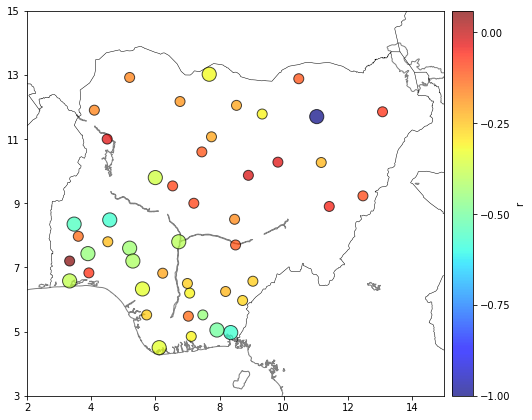

In [16]:
# plot coastlines with Basemap
plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='h',
llcrnrlat=3, urcrnrlat=15,
llcrnrlon=2, urcrnrlon=15)
# m.drawmapboundary(fill_color='#DDEEFF')
# m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='grey', zorder=2)
m.drawcountries(color='black', zorder=2)
# m.shadedrelief()
m.drawstates()

# m.readshapefile('./nigeria_states/nigeria_states', 'nigeria_states')

# plot locations
m.scatter(cor_df["Long"], cor_df["Lat"], latlon=True, 
          c=cor_df["r_value"], s=cor_df["p"]*100,
          edgecolors="black", zorder=3,
          cmap='jet', alpha=0.7)

# create colorbar and legend
m.colorbar(label=r'r', ticks=np.linspace(1, -1, 9), shrink=0.755)
# plt.set_ticks(np.linspace(1, -1, 9))
plt.xticks(range(2, 16, 2))
plt.yticks(range(3, 16, 2))
plt.show()